In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
def load_data(filename):
    df = pd.read_csv(filename)
    df['Date'] = pd.to_datetime(df['Date'])
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year
    return df

In [4]:
def plt_avg_fire(df):
    plt.figure(figsize=(15, 6))
    yearly_avg = df.groupby('Year')['Estimated_fire_area'].mean()
    yearly_avg.plot(kind='line', marker='o')
    plt.title('Average Estimated Fire Area Over Years')
    plt.xlabel('Year')
    plt.ylabel('Average Fire Area (km²)')
    plt.grid(True)
    return plt

In [5]:
def plt_avg_fire_month(df):
    plt.figure(figsize=(12, 6))
    monthly_avg = df.groupby('Month')['Estimated_fire_area'].mean()
    monthly_avg.plot(kind='line', marker='o')
    plt.title('Average Estimated Fire Area by Month')
    plt.xlabel('Month')
    plt.ylabel('Average Fire Area (km²)')
    plt.grid(True)
    return plt

In [11]:
def fire_brightness(df):
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df, x='Region', y='Mean_estimated_fire_brightness')
    plt.title('Mean Estimated Fire Brightness by Region')
    plt.xticks(rotation=45)
    plt.tight_layout()
    return plt

In [13]:
def fire_count_pie(df):
    plt.figure(figsize=(10, 10))
    region_counts = df.groupby('Region')['Count'].sum()
    plt.pie(region_counts, labels=region_counts.index)
    plt.title('Distribution of Fire Pixel Counts by Region')
    return plt

In [16]:
def customize_fire_pie(df):
    plt.figure(figsize=(12, 8))
    region_counts = df.groupby('Region')['Count'].sum()
    colors = sns.color_palette('husl', n_colors=len(region_counts))
    plt.pie(region_counts, labels=region_counts.index, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=90)
    plt.title('Distribution of Fire Pixel Counts by Region (Enhanced)')
    return plt


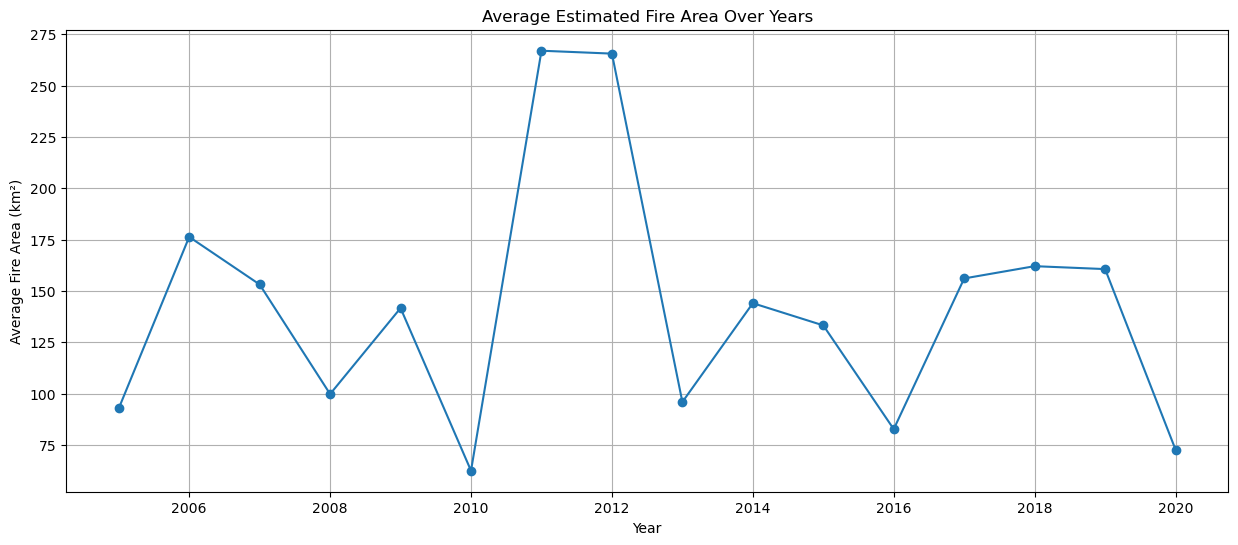

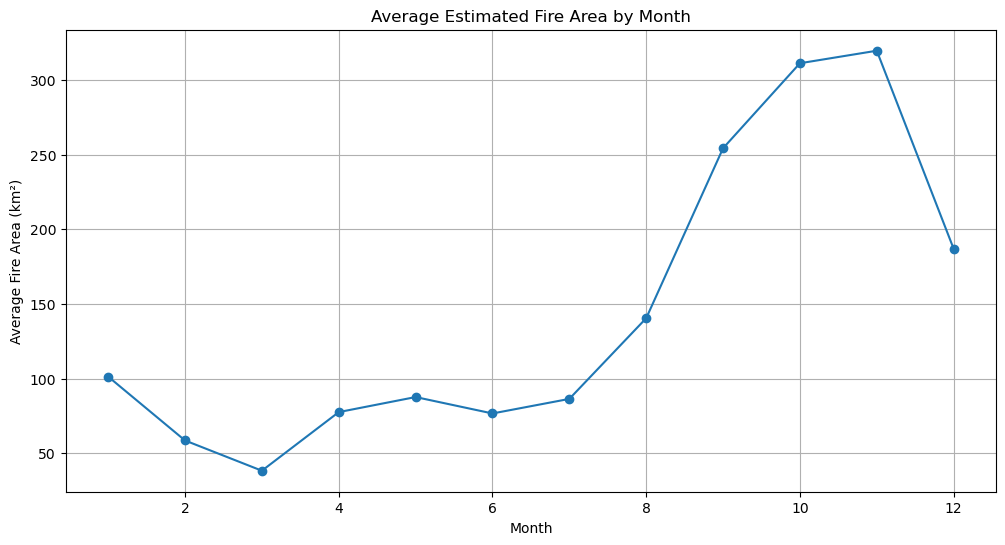

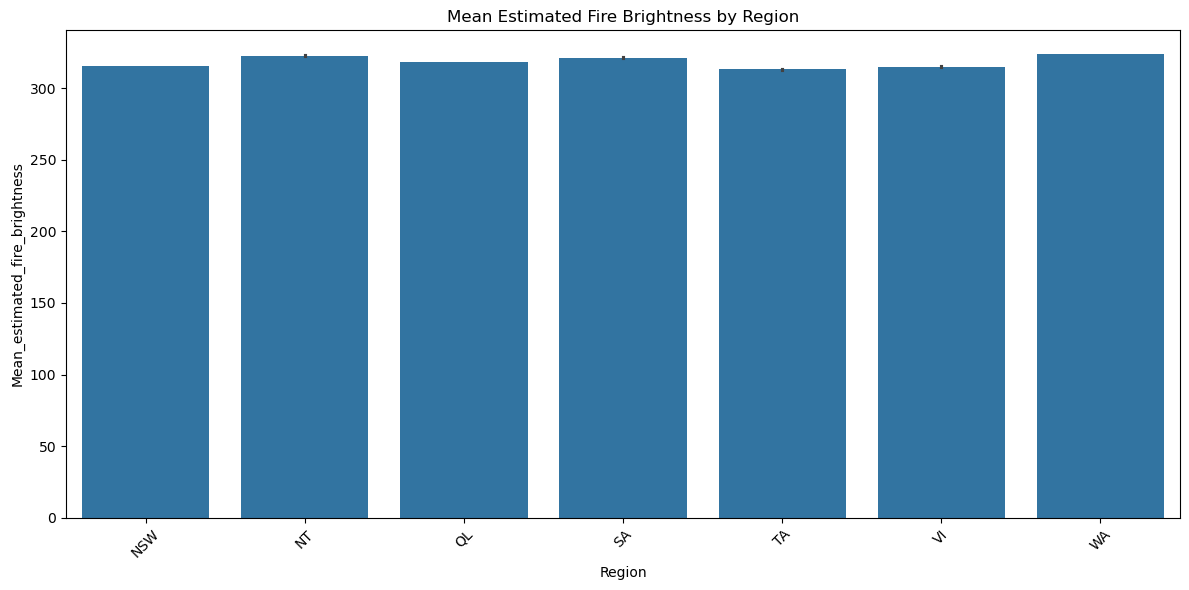

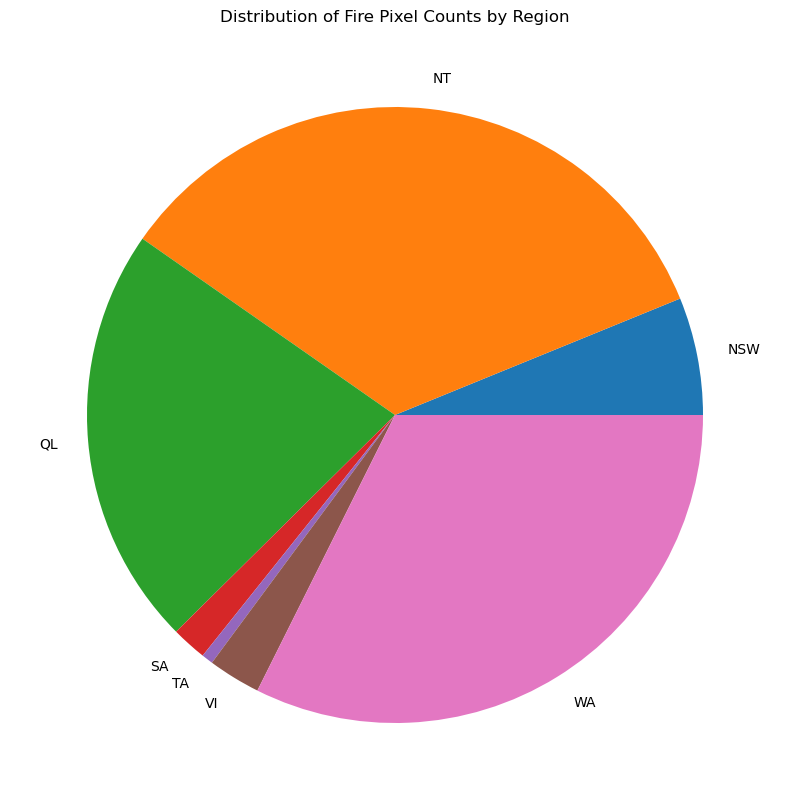

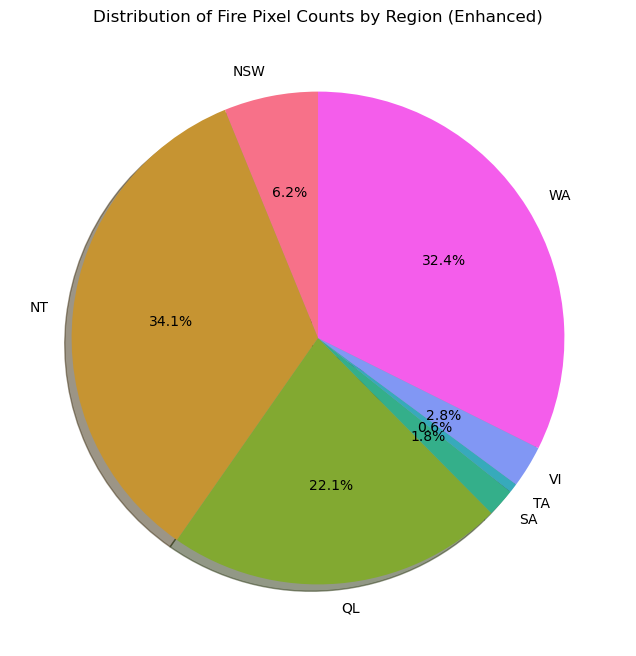

In [17]:
def main():
    
    df = load_data('Historical_Wildfires.csv')
    
    plt_avg_fire(df)
    plt_avg_fire_month(df)
    fire_brightness(df)
    fire_count_pie(df)
    customize_fire_pie(df)
    
if __name__ == "__main__":
    main()